# Sundanese Tweet Emotion Classification (NLP)
---




In this project, we decided to try an NLP Task (Emotion Classification).

The dataset are gathered from Twitter API that is filtered by using some hashtags which are representing Sundanese emotion. These are the hashtags :
 *#persib*, *#corona*, *#saredih*,
*#nyakakak*, *#garoblog*, *#sangsara*, *#gumujeng*, *#bungah*,
*#sararieun*, *#ceurik*, and *#hariwang*.

There are 4 emotions in this dataset, which are :
1. **anger**
2. **joy**
3. **fear**
4. **sadness**

We will use Random Forest as a baseline model in this project, and use another method as comparison.

Fizio Ramadhan Herman - 1301213219

M. Ridho Sunation - 1301213038

Mario Bernardino Surexi Keubapa - 1301213220

# Importing Dependencies and Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/sundanese_twitter_dataset/data.csv')
df.head()

,label,data
0,anger,"sok geura leungit atuh sia teh corona, matak g..."
1,anger,"Nu katoel katuhu nu nyerina kenca, goblog wasitna"
2,joy,Bingah pisan patepang sareng pangerasa. Sing k...
3,fear,asa hariwang kieu.. lalakon hirup teh asa nyor...
4,anger,"Orang mana sih anying, sampis pisan. Bunuh ae ..."


As we can see here, the dataset only contains 2 features, which are :
1. label := for the emotion classification
2. data := the tweet in Sundanese

# Visualizing the Dataset

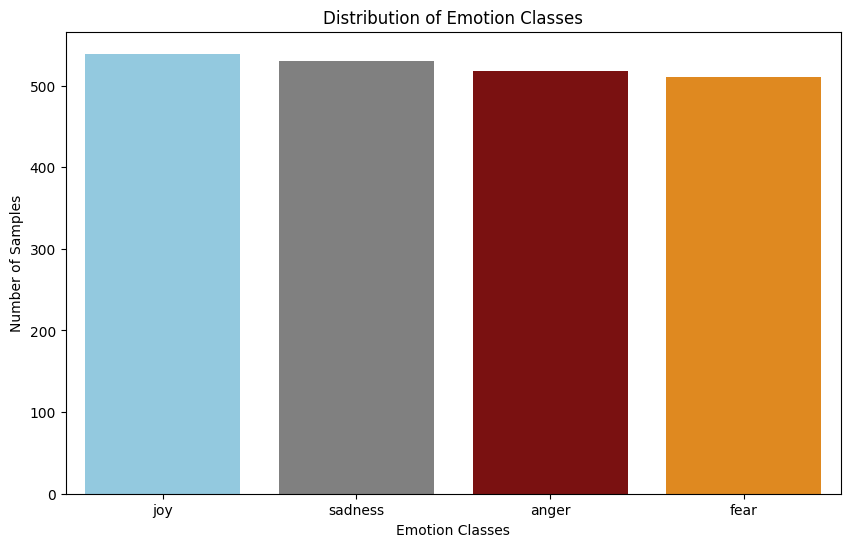

In [ ]:
emotion_colors = {
    'joy': 'skyblue',
    'sadness': 'grey',
    'anger': 'darkred',
    'fear' : 'darkorange'
}

# counts each classes
label_counts = df['label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette=[emotion_colors[label] for label in label_counts.index])
plt.title('Distribution of Emotion Classes')
plt.xlabel('Emotion Classes')
plt.ylabel('Number of Samples')
plt.show()

In [ ]:
print(label_counts)

joy        539
sadness    530
anger      518
fear       511
Name: label, dtype: int64


The dataset contains **2098** rows of data, and it looks equally distributed

# Data Preprocessing

## Lowercasing

In [ ]:
df['data'] = df['data'].str.lower()
df['data']

0       sok geura leungit atuh sia teh corona, matak g...
1       nu katoel katuhu nu nyerina kenca, goblog wasitna
2       bingah pisan patepang sareng pangerasa. sing k...
3       asa hariwang kieu.. lalakon hirup teh asa nyor...
4       orang mana sih anying, sampis pisan. bunuh ae ...
                              ...                        
2093       meuni ngeunah ngabarakatak eeeuy uiiiiing....!
2094    meuni ku endah, tebeda nami na gusti nu agung,...
2095    meuni bungah kieu euy meunang di ngalam, nuhun...
2096    meuni bingah ningalna ya alloh mudah" pas 02 k...
2097            meuni atoh ningali adi lanceuk guyub kitu
Name: data, Length: 2098, dtype: object

**Convert all text to lowercase**. This ensures consistency in the representation of words and helps the model generalize better by treating words in different cases as the same.

## Removing Punctuation and Special Characters

In [ ]:
import re
df['data'] = df['data'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df['data']

0       sok geura leungit atuh sia teh corona matak ge...
1        nu katoel katuhu nu nyerina kenca goblog wasitna
2       bingah pisan patepang sareng pangerasa sing ka...
3       asa hariwang kieu lalakon hirup teh asa nyoran...
4       orang mana sih anying sampis pisan bunuh ae la...
                              ...                        
2093            meuni ngeunah ngabarakatak eeeuy uiiiiing
2094    meuni ku endah tebeda nami na gusti nu agung d...
2095    meuni bungah kieu euy meunang di ngalam nuhun ...
2096    meuni bingah ningalna ya alloh mudah pas  keng...
2097            meuni atoh ningali adi lanceuk guyub kitu
Name: data, Length: 2098, dtype: object

**Remove unnecessary punctuation and special characters** that might not contribute much to the meaning of the text.

## Tokenizing the words

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Tokenize the 'data' column
df['data'] = df['data'].apply(word_tokenize)
df['data']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [sok, geura, leungit, atuh, sia, teh, corona, ...
1       [nu, katoel, katuhu, nu, nyerina, kenca, goblo...
2       [bingah, pisan, patepang, sareng, pangerasa, s...
3       [asa, hariwang, kieu, lalakon, hirup, teh, asa...
4       [orang, mana, sih, anying, sampis, pisan, bunu...
                              ...                        
2093      [meuni, ngeunah, ngabarakatak, eeeuy, uiiiiing]
2094    [meuni, ku, endah, tebeda, nami, na, gusti, nu...
2095    [meuni, bungah, kieu, euy, meunang, di, ngalam...
2096    [meuni, bingah, ningalna, ya, alloh, mudah, pa...
2097    [meuni, atoh, ningali, adi, lanceuk, guyub, kitu]
Name: data, Length: 2098, dtype: object

**Break the text into individual words or tokens**, to help convert raw text into a format that is suitable for analysis and model training.

## Removing stopwords

in this dataset that we've downloaded, it came with its own stopwords in seperated .txt file, which is written in **Sundanese**

In [ ]:
sundanese_stopwords = '/content/drive/MyDrive/Dataset/sundanese_twitter_dataset/stopwordv1.txt'

with open(sundanese_stopwords, 'r') as file:
    stopwords = set(file.read().splitlines())

# Function to remove custom stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stopwords]

# Apply the function to the 'data' column
df['data'] = df['data'].apply(remove_stopwords)
df['data']


0       [geura, leungit, sia, corona, gelo, yeuh, aing...
1       [katoel, katuhu, nyerina, kenca, goblog, wasitna]
2       [bingah, patepang, pangerasa, sing, katampi, k...
3                   [hariwang, lalakon, hirup, nyorangan]
4          [orang, sih, anying, sampis, bunuh, ae, bunuh]
                              ...                        
2093      [meuni, ngeunah, ngabarakatak, eeeuy, uiiiiing]
2094    [meuni, endah, tebeda, nami, gusti, agung, dim...
2095    [meuni, bungah, meunang, ngalam, nuhun, bahh, ...
2096    [meuni, bingah, ningalna, alloh, mudah, pas, k...
2097          [meuni, atoh, ningali, adi, lanceuk, guyub]
Name: data, Length: 2098, dtype: object

# Data Modelling

## Splitting the Data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, classification_report


# Extract features and labels
X = df['data']
y = df['label']

## **Random Forest**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
model = make_pipeline(CountVectorizer(analyzer=lambda x: x), RandomForestClassifier(random_state=42))

# Define a custom scorer for cross_val_score
custom_scorer = make_scorer(accuracy_score)

# Perform 5-fold cross-validation and get cross-validated predictions
cv_predicted_labels = cross_val_predict(model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Evaluate the model
precision_RF = precision_score(y, cv_predicted_labels, average='weighted')
recall_RF = recall_score(y, cv_predicted_labels, average='weighted')
f1_RF = f1_score(y, cv_predicted_labels, average='weighted')
accuracy_RF = accuracy_score(y, cv_predicted_labels)
# Display the evaluation metrics
print("\nModel Evaluation (Cross-Validation):")
print(f"Precision: {precision_RF:.3f}")
print(f"Recall: {recall_RF:.3f}")
print(f"F1 Score: {f1_RF:.3f}")
print(f"Accuracy: {accuracy_RF:.3f}")


Model Evaluation (Cross-Validation):
Precision: 0.930
Recall: 0.928
F1 Score: 0.928
Accuracy: 0.928


## **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = make_pipeline(CountVectorizer(analyzer=lambda x: x), AdaBoostClassifier(random_state=42))

# Define a custom scorer for cross_val_score
custom_scorer = make_scorer(accuracy_score)

# Perform 5-fold cross-validation and get cross-validated predictions
cv_predicted_labels = cross_val_predict(model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Evaluate the model
precision_AB = precision_score(y, cv_predicted_labels, average='weighted')
recall_AB = recall_score(y, cv_predicted_labels, average='weighted')
f1_AB = f1_score(y, cv_predicted_labels, average='weighted')
accuracy_AB = accuracy_score(y, cv_predicted_labels)
# Display the evaluation metrics
print("\nModel Evaluation (Cross-Validation):")
print(f"Precision: {precision_AB:.3f}")
print(f"Recall: {recall_AB:.3f}")
print(f"F1 Score: {f1_AB:.3f}")
print(f"Accuracy: {accuracy_AB:.3f}")


Model Evaluation (Cross-Validation):
Precision: 0.880
Recall: 0.856
F1 Score: 0.860
Accuracy: 0.856


## **XGBoost**

Preprocessing needs to be done in XGBoost Model

In [ ]:
from xgboost import XGBClassifier

# XGBoost model
model = make_pipeline(
    CountVectorizer(),
    XGBClassifier(n_estimators=100, learning_rate=0.1)
)

#because xgboost require numeric so we change the data a little bit
X_xg = df['data'].apply(lambda x: " ".join(x)).tolist()
label_map = {"anger": 0, "fear": 1, "joy": 2, "sadness": 3}
y_xg = y.map(label_map)

# Cross validation
cv_predicted = cross_val_predict(model, X_xg, y_xg, cv=5)

# Evaluate the model
precision_XG = precision_score(y_xg, cv_predicted, average='weighted')
recall_XG = recall_score(y_xg, cv_predicted, average='weighted')
f1_XG = f1_score(y_xg, cv_predicted, average='weighted')
accuracy_XG = accuracy_score(y_xg ,cv_predicted)
# Display the evaluation metrics
print("\nModel Evaluation (Cross-Validation):")
print(f"Precision: {precision_XG:.3f}")
print(f"Recall: {recall_XG:.3f}")
print(f"F1 Score: {f1_XG:.3f}")
print(f"Accuracy: {accuracy_XG:.3f}")


Model Evaluation (Cross-Validation):
Precision: 0.918
Recall: 0.908
F1 Score: 0.910
Accuracy: 0.908


# Evaluation

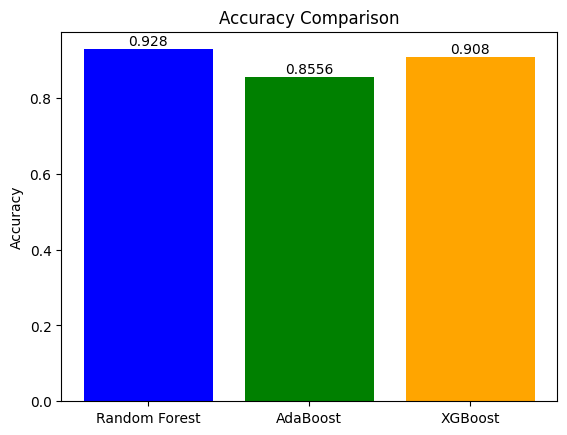

In [ ]:
models = ['Random Forest', 'AdaBoost','XGBoost']
scores = [accuracy_RF,accuracy_AB,accuracy_XG]
colors = ['blue', 'green', 'orange']

fig, ax = plt.subplots()
ax.bar(models,scores,color=colors)
ax.set_title("Accuracy Comparison")
ax.set_ylabel("Accuracy")
for i, v in enumerate(scores):
    ax.text(i, v+0.01, str(round(v, 4)), ha='center')
plt.show()


1. Random Forest
- Accuracy: 0.928
- Precision: 0.930
- Recall: 0.928
- F1-Score: 0.928
Overall the Random Forest model demonstrated the **best performance** compared to the other models, with 92.80% accuracy on cross-validation. The precision, recall, and F1-score values were also highest and most stable among the three models.

2. AdaBoost
- Accuracy: 0.856
- Precision: 0.880
- Recall: 0.856
- F1-Score: 0.860

The performance of AdaBoost was slightly lower than Random Forest, with 85.60% accuracy. The evaluation metrics were also more varied across emotion classes.

3. XGBoost
- Accuracy: 0.908
- Precision: 0.918
- Recall: 0.908
- F1-Score: 0.910

XGBoost demonstrated performance in between Random Forest and AdaBoost. Its accuracy was quite high at 90.80%, but other metrics were slightly more varied across emotion classes.

Overall, Random Forest showed the best and most stable results on this Sundanese tweet dataset. But XGBoost was also competitive with only around 2% difference in accuracy from Random Forest.